Lendo o dataset que salvei no processo de ETL.

In [22]:
dataset = spark.read.csv('abfss://disco1@storageguidatalake.dfs.core.windows.net/data/dataset.csv/part-000??-69dc1255-b664-46f3-b53c-0cc7e120de8a-c000.csv', sep=',',header=True)


StatementMeta(guispark, 26, 22, Finished, Available)

## Questão 1

In [23]:
from pyspark.sql import functions as f

StatementMeta(guispark, 26, 23, Finished, Available)

Pra responder essa pergunta fiz a seleção das colunas onde tem a contagem de passageiros e a distância da viagem e agrupei a informação pra realizar a média da distância com esses parâmetros. Então no resultado final encontramos as médias quando a contagem de passageiros não excede 2.

In [24]:
dataset\
  .select('passenger_count', 'trip_distance')\
  .where('passenger_count<=2')\
  .groupBy('passenger_count')\
  .agg(
       f.mean('trip_distance').alias('Distância Média')\
  )\
  .show(truncate=False)

StatementMeta(guispark, 26, 24, Finished, Available)

+---------------+------------------+
|passenger_count|Distância Média   |
+---------------+------------------+
|0              |1.897297297297297 |
|1              |2.6140128013420725|
|2              |2.835128496886788 |
+---------------+------------------+



In [25]:
q_1 = dataset\
  .select('passenger_count', 'trip_distance')\
  .where('passenger_count<=2')\
  .groupBy('passenger_count')\
  .agg(
       f.mean('trip_distance').alias('Distância Média')\
  )

StatementMeta(guispark, 26, 25, Finished, Available)

Entretanto se quiser a média geral com menos de 2 passageiros a resposta correta é essa abaixo!

In [26]:
q_1.agg({'Distância Média': 'avg'}).show()


StatementMeta(guispark, 26, 26, Finished, Available)

+--------------------+
|avg(Distância Média)|
+--------------------+
|   2.448812865175386|
+--------------------+



## Questão 2

Mais um agrupamento pelos fornecedores do serviço, podendo analisar quais deles mais arrecadam.

In [27]:
dataset\
  .groupBy('name')\
  .agg(
       f.sum('total_amount').alias('Total Arrecadado')
  )\
  .orderBy('Total Arrecadado', ascending=False)\
  .limit(3)\
  .show(truncate=False)

StatementMeta(guispark, 26, 27, Finished, Available)

+---------------------------------+--------------------+
|name                             |Total Arrecadado    |
+---------------------------------+--------------------+
|Creative Mobile Technologies, LLC|1.954908428000027E7 |
|VeriFone Inc                     |1.9043433999999836E7|
|Dependable Driver Service, Inc   |2714901.719999995   |
+---------------------------------+--------------------+



## Questão 3

Filtrando o dataframe pra analisar a frequência por mês no qual o pagamento é o dinheiro.

In [28]:
df_3 = dataset\
  .select('Data', f.month('Data').alias('Mes'))\
  .where("payment_type=='Cash'")

df_3.show()

StatementMeta(guispark, 26, 28, Finished, Available)

+----------+---+
|      Data|Mes|
+----------+---+
|2012-07-15|  7|
|2012-07-02|  7|
|2012-09-10|  9|
|2012-07-16|  7|
|2012-06-16|  6|
|2012-07-05|  7|
|2012-08-12|  8|
|2012-05-09|  5|
|2012-01-10|  1|
|2012-03-11|  3|
|2012-02-10|  2|
|2012-02-08|  2|
|2012-02-21|  2|
|2012-05-05|  5|
|2012-01-13|  1|
|2012-07-20|  7|
|2012-07-10|  7|
|2012-06-27|  6|
|2012-02-03|  2|
|2012-04-12|  4|
+----------+---+
only showing top 20 rows



In [29]:
import matplotlib.pyplot as plt

StatementMeta(guispark, 26, 29, Finished, Available)

In [30]:
df = df_3.toPandas()

StatementMeta(guispark, 26, 30, Finished, Available)

Utilizando o matplotlib podemos obter esse histograma abaixo com certa facilidade. 

StatementMeta(guispark, 26, 31, Finished, Available)

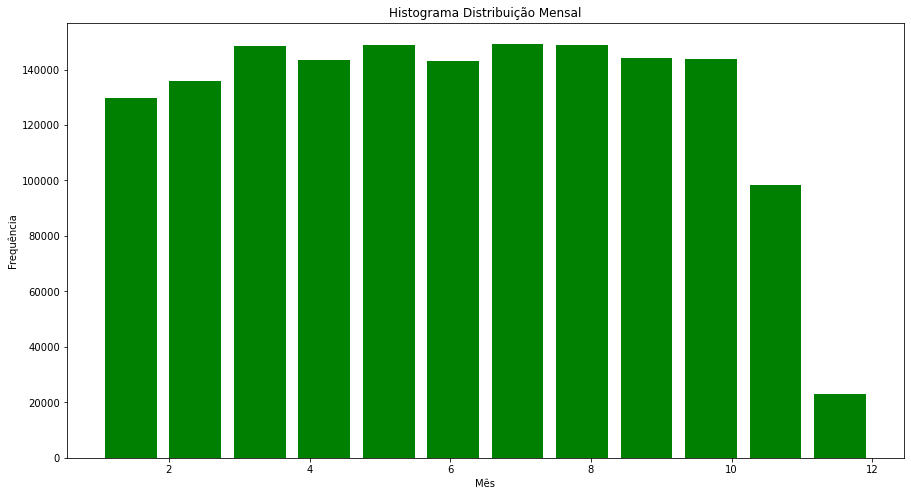

In [31]:
plt.figure(figsize=[15,8])
plt.hist(df['Mes'], rwidth=0.8,color='green', bins=12) 
plt.ylabel('Frequência')
plt.xlabel('Mês')
plt.title('Histograma Distribuição Mensal')
plt.show() 

## Questão 4

In [32]:
q_4 = dataset\
        .select('tip_amount', 'Data', f.year('Data').alias('Ano'), f.month('Data').alias('Mes'))\
        .where('Ano==2012')\
        .where('Mes > 9')\
        .groupBy('Data')\
        .agg(
            f.count('tip_amount').alias('Quantidade das Gorjetas')
        )\
        .orderBy('Data', ascending=True)

StatementMeta(guispark, 26, 32, Finished, Available)

In [33]:
q_4 = q_4.toPandas()

StatementMeta(guispark, 26, 33, Finished, Available)

In [34]:
import plotly.graph_objects as go

StatementMeta(guispark, 26, 34, Finished, Available)

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=q_4['Data'], y=q_4['Quantidade das Gorjetas'],
                    mode='lines',
                    name='lines'))

fig.update_layout(
    title="Quantidade de Gorjetas por dia",
    xaxis_title="Data",
    yaxis_title="Contagem diária das Gorjetas")
fig.show()

StatementMeta(guispark, 26, 35, Finished, Available)

## Questão 5

Para montar um DataWareHouse para o departamento de RH de um Contact Center precisamos saber quais os melhores KPI's para serem analisados.

Primeiro Passo temos que nos perguntar:

- O que queremos Analisar?
- Como queremos Analisar?



Depois de Analisar um pouco selecionei alguns parâmetros que poderiam ser importantes pensando no departamento de RH de um Contact Center.


![image-1](https://storageguidatalake.blob.core.windows.net/images/Dimensao_Indicador)

Então subi um banco de dados SQL Sever na nuvem da Azure....

![image-2](https://storageguidatalake.blob.core.windows.net/images/SQl_Server_Cloud.png)

Então eu criei todos os relacionamentos entre as dimensões sendo utilizado como atributo uma dimensão auxiliar dos KPI's...

![image-3](https://storageguidatalake.blob.core.windows.net/images/Tables_Relations.png)

![image-4](https://storageguidatalake.blob.core.windows.net/images/diagrama.png)